# WeatherPy
The following is a Python script to help visualize the weather patterns of 500+ randomly selected cities across the world of varying distance from the equator. The data collected allows us to observe the following trends:
- The cities near the ecuator (with latitude = 0) show higher temperatures within a range of 60F to approx 100F. There is a strong negative correlation between the temperature and latitide. In other words, the more north a city is the lower the temperature reported. 
- The wind speed average around 8 to 10 mph across all sample cities. But otherwise show a weak correlation with respect to the latitude.
- The % cloudiness does not show to have any correlation with latitude. It averages around 40% but with a large variance of apprx 35. 
- The humidty % collected for this sample average is between 75% and 80%, with a large variance of 22 showing a weak correlation with latitude.

In [1]:
# Dependencies
import requests as req
import time
from citipy import citipy
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#update config with api key 
from config import OpenWeather


In [2]:
# create filenames for the output files
output_csv = "figures/WeatherPy.csv"
output_temp = "figures/WeatherPyTemperature.png"
output_cloud = "figures/WeatherPyCloudiness.png"
output_windsp = "figures/WeatherPyWindspeed.png"
output_humid ="figures/WeatherPyHumidity.png"

In [3]:
# Input will be froom a selection of 500+ random coordinates. We want to generate a list a 500+ unique cities. 
num_coordinates = 1500
coordinates = [(randrange(-90,90), randrange(-180,180)) 
               for c in range(0,num_coordinates)]
cities = set()
for lat, lon in coordinates:
    cities.add(citipy.nearest_city(lat, lon).city_name)

print(f"From {len(coordinates)} random coordinates we generated a list of {len(cities)} different cities")

From 1500 random coordinates we generated a list of 633 different cities


In [4]:
# Setup endpoint information.
url = "http://api.openweathermap.org/data/2.5/weather"

In [5]:
# Set query parameters
params = {'appid': OpenWeather,
          'q': '',
          'units': 'imperial'}

In [6]:
# Loop through the list of cities and perform a request for data on each
weather_data = []
request_errors =[]

for city in cities:
    # Get weather data
    params['q'] = city
    try:
        response = req.get(url, params=params)
        response.raise_for_status()
        weather_json = response.json()
        weather_data.append({'name':weather_json['name'],
                      'temperature':weather_json["main"]["temp"],
                      'humidity':weather_json["main"]["humidity"],
                      'windspeed':weather_json["wind"]["speed"],
                      'cloudiness':weather_json["clouds"]["all"],
                      'latitude':weather_json["coord"]["lat"],
                      'longitude':weather_json['coord']['lon']})
        # show some progress and allow for time between server requests
        print('.',end='')
        time.sleep(1)
    except req.exceptions.RequestException as e:
        request_errors.append('str(e)')
        
print(f"Attempted {len(cities)} requests to Open Weather with random coordinates. {len(request_errors)} attempts failed")        


Attempted 633 requests to Open Weather with random coordinates. 68 attempts failed


In [7]:
# Create Data Frame with weather data        
city_weather_df = pd.DataFrame(weather_data)
city_weather_df.head()

,cloudiness,humidity,latitude,name,temperature,windspeed
0,8,100,9.96,Ranong,81.4,6.24
1,90,79,52.06,Achim,39.2,13.87
2,12,100,0.53,Thinadhoo,81.9,1.32
3,75,66,-42.88,Hobart,53.6,4.70
4,0,61,60.17,Helsinki,15.8,9.17


In [8]:
# Save data in a csv file
city_weather_df.to_csv(output_csv)

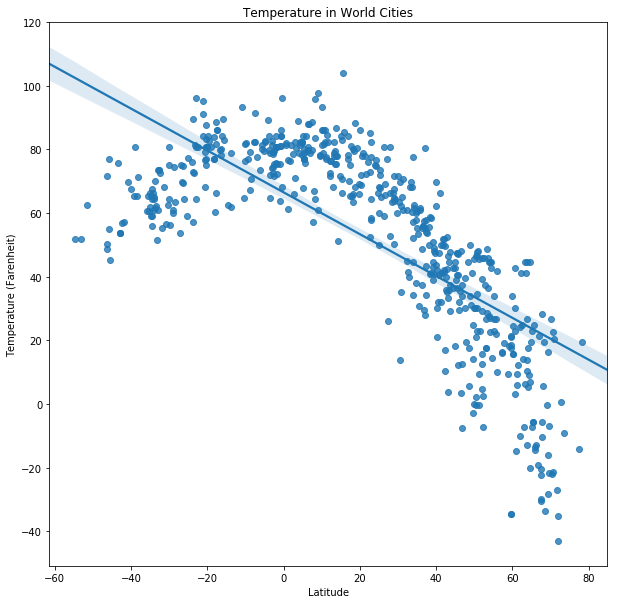

In [9]:
# plot the relationship Temperature (F) vs. Latitude
fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)
# Build a scatter plot for each data type
sns.regplot(x="latitude", y="temperature", data=city_weather_df)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(output_temp)
plt.legend(loc='best')
plt.show()

Avg = 73.94336283185841, Variance = 22.632282050181548


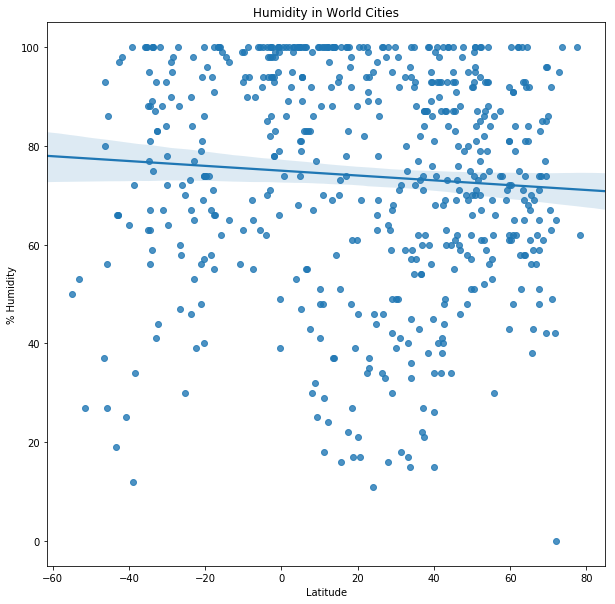

In [22]:
# plot the relationship Humidity (%) vs. Latitude
fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)

avg = city_weather_df['humidity'].mean()
variance = city_weather_df['humidity'].std()
print(f"Avg = {avg}, Variance = {variance}")
# Build a scatter plot for each data type
sns.regplot(x="latitude", y="humidity", data = city_weather_df)

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("% Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(output_humid)
plt.legend(loc='best')
plt.show()

Avg = 40.15221238938053, Variance = 34.93857095909948


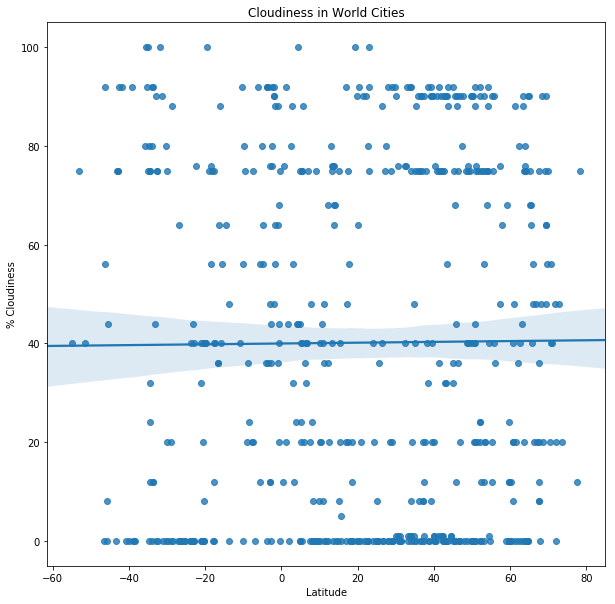

In [21]:
# plot the relationship Cloudiness (%) vs. Latitude
fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)

avg = city_weather_df['cloudiness'].mean()
variance = city_weather_df['cloudiness'].std()
print(f"Avg = {avg}, Variance = {variance}")
# Build a scatter plot for each data type
sns.regplot(x="latitude", y="cloudiness", data = city_weather_df)

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("% Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(output_cloud)
plt.legend(loc='best')
plt.show()

Avg = 8.733646017699101, Variance = 6.062160437109402


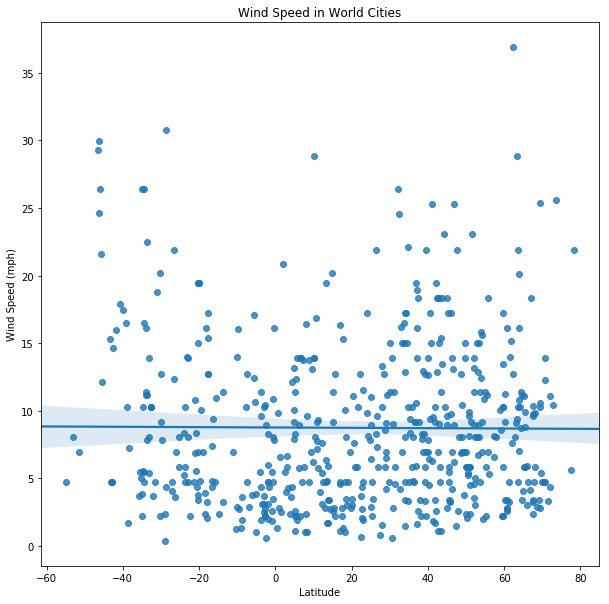

In [23]:
# plot the relationship Wind Speed (mph) vs. Latitude
fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)

avg = city_weather_df['windspeed'].mean()
variance = city_weather_df['windspeed'].std()
print(f"Avg = {avg}, Variance = {variance}")
# Build a scatter plot for each data type
sns.regplot(x="latitude", y="windspeed", data = city_weather_df)

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig(output_windsp)
plt.legend(loc='best')
plt.show()